# 2nd question

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def f(x):
    eq = 100*(x[0] - x[1])**2 + (x[1] - 1)**2
    return eq

In [3]:
def grad_f(x):
    grad_eq = np.array([200*(x[0] - x[1]), 2*(x[1] - 1)])
    return grad_eq

In [4]:
def backtracking_line_search(x, p):
    alp = 1
    rho = 0.001
    sig = 0.9
    c = 0.01
    while True:
        if f(x + alp*p) > f(x) + c*alp*np.dot(grad_f(x), p):
            alp = sig*alp
        else:
            break
    return alp

In [5]:
# Test the function
x = np.array([0, 0])
p = -grad_f(x)
alpha = backtracking_line_search(x, p)
x_new = x + alpha*p
x_new

The output is:


array([0.        , 0.01939547])

# 3rd question

In [6]:
def backtracking_line_search_3(x, p):
    alp = 1
    rho = 0.001
    c = 0.9
    while True:
        if f(x + alp*p) > f(x) + rho*alp*np.dot(grad_f(x), p):
            alp = c*alp
        else:
            break
    return alp

In [7]:
def steepest_descent_backtracking_fun(x0, tol, max_iter):
    x = x0
    error_list = []
    with open('sd_backtracking_data.txt', 'w') as file:
        file.write('Iteration\tError\n')
        file.write(f'{0}\t{np.linalg.norm(x - np.array([1, 1]))}\n')
        error_list.append(np.linalg.norm(x - np.array([1, 1])))

        for i in range(1, max_iter+1):
            x1 = -grad_f(x)
            alp_k = backtracking_line_search_3(x, x1)
            x = x + alp_k*x1
            error = np.linalg.norm(x - np.array([1, 1]))
            error_list.append(error)
            file.write(f'{i}\t{error}\n')
            if error < tol:
                break
    return x, error_list

In [8]:
# Testing the function
x0 = np.array([0, 0])
tol = 1e-10
max_iter = 3000
x, error_list = steepest_descent_backtracking_fun(x0, tol, max_iter)

Graph is: 


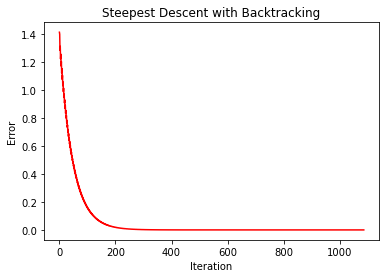

In [9]:
# Plot the error vs iteration number
import matplotlib.pyplot as plt
plt.plot(np.arange(len(error_list)), error_list)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Steepest Descent with Backtracking')
plt.show()

# 4th question

In [10]:
def f_4(x):
    eq = 100*(x[0] - x[1])**2 + (x[1] - 1)**2
    return eq

In [11]:
def gradient_function(x):
    gd = np.array([200*(x[0] - x[1]), - 200*(x[0] - x[1]) + 2*(x[1] - 1)])
    return gd

In [12]:
def backtracking_line_search_4(x, p):
    alpha=1.0
    rho=0.9
    c=0.001
    while f_4(x + alpha*p) > f_4(x) + c*alpha*np.dot(gradient_function(x), p):
        alpha *= rho
    return alpha


In [17]:
def bfgs(x0, tol, m):
    x_value = x0
    k=0
    error = np.linalg.norm(x_value - np.array([1, 1]))
    H = np.eye(2)
    error_list = []
    with open('bfgs_data.txt', 'w') as file:
        file.write('Iteration\tError\n')
        file.write(f'{k}\t{error}\n')
        while True:
            if error < tol:
                break
            init_grad_value = -np.dot(H, gradient_function(x_value))
            alpha_value = backtracking_line_search_4(x_value, init_grad_value)
            updated_x = x_value + alpha_value*init_grad_value
            x_temp = updated_x - x_value
            grad_value = gradient_function(updated_x) - gradient_function(x_value)
            rho_value = 1 / np.dot(grad_value.T, x_temp)
            H = (np.eye(2) - rho_value*np.dot(x_temp, grad_value.T)) @ H @ (np.eye(2) - rho_value*np.dot(grad_value, x_temp.T)) + rho_value*np.dot(x_temp, grad_value.T)
            x_value = updated_x
            error_list.append(error)
            error = np.linalg.norm(x_value - np.array([1, 1]))
            k += 1
            file.write(f'{k}\t{error}\n')
    return x_value,error_list

In [16]:
# Test the function
x0 = np.array([0, 0])
tol = 1e-10
xs,error_lists = bfgs(x0,tol,1000)

Inital error is  1.4142135623730951


In [18]:
error_lists

Error list is : 


[1.4142135623730951,
 1.400566041014594,
 1.3740835248413337,
 1.3345465203948852,
 1.2820163493408567,
 1.2216723677259982,
 1.1541396513956375,
 1.0752545747115845,
 0.9948244738100871,
 0.9052509984801332,
 0.820513035440695,
 0.7282665952930977,
 0.6473931185232821,
 0.5674884199138632,
 0.501191689714958,
 0.4222627788805437,
 0.3666103011690123,
 0.3061921556918261,
 0.2607709832863934,
 0.21246668529141297,
 0.17760304256925324,
 0.1409314073805691,
 0.11576231899291203,
 0.08926473942070876,
 0.07220523586376264,
 0.05393688275745139,
 0.043128424121694015,
 0.031073622780602665,
 0.024728450029200297,
 0.01708450771553159,
 0.013692238557974665,
 0.009014146174633449,
 0.007419762786542805,
 0.0046511410212014504,
 0.004039292421215799,
 0.002465293837191527,
 0.0022987425802630354,
 0.001450912528423882,
 0.0014159471812057027,
 0.000977889813218616,
 0.0009455838468569332,
 0.0007154285687625243,
 0.000667055892717833,
 0.0005369648481554337,
 0.0004843725433446128,
 0.00040

Below is the graph:

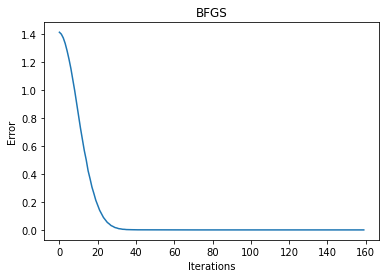

In [23]:
# Plot the error vs iteration number
k = np.arange(len(error_lists))
import matplotlib.pyplot as plt
plt.plot(k, error_lists)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('BFGS')
plt.show()

In [20]:
log_error_values=np.log(error_lists)

In [24]:
log_error_values

array([ 3.46573590e-01,  3.36876470e-01,  3.17786982e-01,  2.88591549e-01,
        2.48434111e-01,  2.00220713e-01,  1.43355176e-01,  7.25574472e-02,
       -5.18896562e-03, -9.95430273e-02, -1.97825481e-01, -3.17088095e-01,
       -4.34801567e-01, -5.66534935e-01, -6.90766637e-01, -8.62127460e-01,
       -1.00345584e+00, -1.18354241e+00, -1.34411272e+00, -1.54897008e+00,
       -1.72820432e+00, -1.95948198e+00, -2.15621616e+00, -2.41614872e+00,
       -2.62824272e+00, -2.91994075e+00, -3.14357301e+00, -3.47139596e+00,
       -3.69980088e+00, -4.06958321e+00, -4.29092614e+00, -4.70896014e+00,
       -4.90360819e+00, -5.37064271e+00, -5.51168575e+00, -6.00544427e+00,
       -6.07539301e+00, -6.53556259e+00, -6.55995659e+00, -6.93011356e+00,
       -6.96370799e+00, -7.24262880e+00, -7.31263672e+00, -7.52957793e+00,
       -7.63265623e+00, -7.81426408e+00, -7.93875310e+00, -8.10178617e+00,
       -8.23801848e+00, -8.39178081e+00, -8.53372713e+00, -8.68304849e+00,
       -8.82745027e+00, -

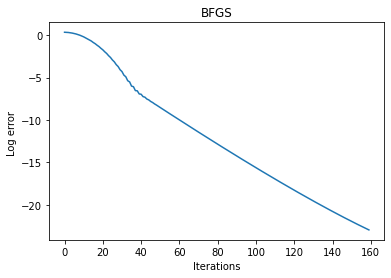

In [25]:
# Plot the error vs iteration number
k = np.arange(len(log_error_values))
import matplotlib.pyplot as plt
plt.plot(k, log_error_values)
plt.xlabel('Iterations')
plt.ylabel('Log error ')
plt.title('BFGS')
plt.show()